# Yelp Data Challenge - Data Preprocessing

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [1]:
import json
import pandas as pd

In [16]:
file_business, file_checkin, file_review, file_tip, file_user = [
    '../dataset/business.json',
    '../dataset/checkin.json',
    '../dataset/review.json',
    '../dataset/tip.json',
    '../dataset/user.json'
]

#### Business Data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'BusinessAcceptsCreditCards': True, 'AcceptsI...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Tuesday': '7:30-17:00', 'Wednesday': '7:30-1...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,{'HairSpecializesIn': {'africanamerican': Fals...,He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Tuesday': '9:00-20:00', 'Monday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.0+ MB


#### Checkin Data

In [ ]:
# with open(file_checkin) as f:
#     df_checkin = pd.DataFrame(json.loads(line) for line in f)
# df_checkin.head(2)

#### Review Data

In [ ]:
# with open(file_review) as f:
#     df_review = pd.DataFrame(json.loads(line) for line in f)
# df_review.head(2)

#### Tip Data

In [ ]:
# with open(file_tip) as f:
#     df_tip = pd.DataFrame(json.loads(line) for line in f)
# df_tip.head(2)

#### User Data

In [ ]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)
# df_user.head(2)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (first filter null categories)

In [6]:
temp = df_business[df_business['city'] == 'Las Vegas'].dropna(subset = ['categories'])
df_filtered = temp[temp['categories'].apply(lambda x: True if 'Restaurants' in x else False)]
del temp

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [7]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [8]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [9]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={"stars":"avg_stars"}, inplace = True)

/Users/jessie/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
# Inspect your DataFrame
df_selected_business.head()

,business_id,name,categories,avg_stars
52,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",4.0
53,4srfPk1s8nlm1YusyDUbjg,Subway,"[Fast Food, Restaurants, Sandwiches]",2.5
54,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"[Arcades, Arts & Entertainment, Gastropubs, Re...",3.0
91,F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"[Italian, Restaurants]",1.5
122,Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"[Restaurants, Fast Food, Burgers]",2.0


#### Save results to csv files

In [12]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('../dataset/selected_business.csv', index = False)

In [14]:
# Try reload the csv file to check if everything works fine
df_selected_business = pd.read_csv('../dataset/selected_business.csv')

### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained
* Only load the reviews in 2016

#### Load review dataset

In [25]:
with open(file_review) as f:
    temp = []
    for line in f:
        ff = json.loads(line)
        if '2016' in ff['date']:
            temp.append(json.loads(line))
    df_review = pd.DataFrame(temp)
    #df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052917 entries, 0 to 1052916
Data columns (total 9 columns):
business_id    1052917 non-null object
cool           1052917 non-null int64
date           1052917 non-null object
funny          1052917 non-null int64
review_id      1052917 non-null object
stars          1052917 non-null int64
text           1052917 non-null object
useful         1052917 non-null int64
user_id        1052917 non-null object
dtypes: int64(4), object(5)
memory usage: 72.3+ MB


#### Prepare dataframes to be joined, - on business_id

In [26]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')
df_left.head(2)

,name,categories,avg_stars
business_id,,,
Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"['Nightlife', 'Bars', 'Barbeque', 'Sports Bars...",4.0
4srfPk1s8nlm1YusyDUbjg,Subway,"['Fast Food', 'Restaurants', 'Sandwiches']",2.5


In [27]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')
df_right.head(2)

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw


#### Join and reset index

In [28]:
# Join df_left and df_right (inner join)
df_joined = df_left.join(df_right, how = "inner")
print(df_joined.shape)
print(df_right.shape)
print(df_left.shape)

(178080, 11)
(1052917, 8)
(5899, 3)


In [29]:
# reset the index 
df_joined.reset_index(inplace = True)

#### Take a glance at the final dataset

* More EDA

In [30]:
import matplotlib.pyplot as plt

% matplotlib inline

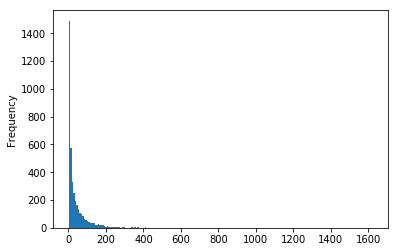

In [32]:
# calculate counts of reviews per business entity, and plot it
df_joined['business_id'].value_counts().plot.hist(bins = 200)
plt.show()

In [40]:
# calculate the number of reviews as a time series
df_time = df_joined.groupby('date').agg({'date':'count'})
df_time['1star_reviews'] = df_joined[df_joined['stars']==1].groupby('date').agg({'date':'count'})
df_time['2star_reviews'] = df_joined[df_joined['stars']==2].groupby('date').agg({'date':'count'})
df_time['3star_reviews'] = df_joined[df_joined['stars']==3].groupby('date').agg({'date':'count'})
df_time['4star_reviews'] = df_joined[df_joined['stars']==4].groupby('date').agg({'date':'count'})
df_time['5star_reviews'] = df_joined[df_joined['stars']==5].groupby('date').agg({'date':'count'})

df_time.head(5)

,date,1star_reviews,2star_reviews,3star_reviews,4star_reviews,5star_reviews
date,,,,,,
2016-01-01,492,73,44,67,111,197
2016-01-02,646,93,60,100,139,254
2016-01-03,623,78,53,74,147,271
2016-01-04,588,84,54,66,138,246
2016-01-05,475,56,39,57,120,203


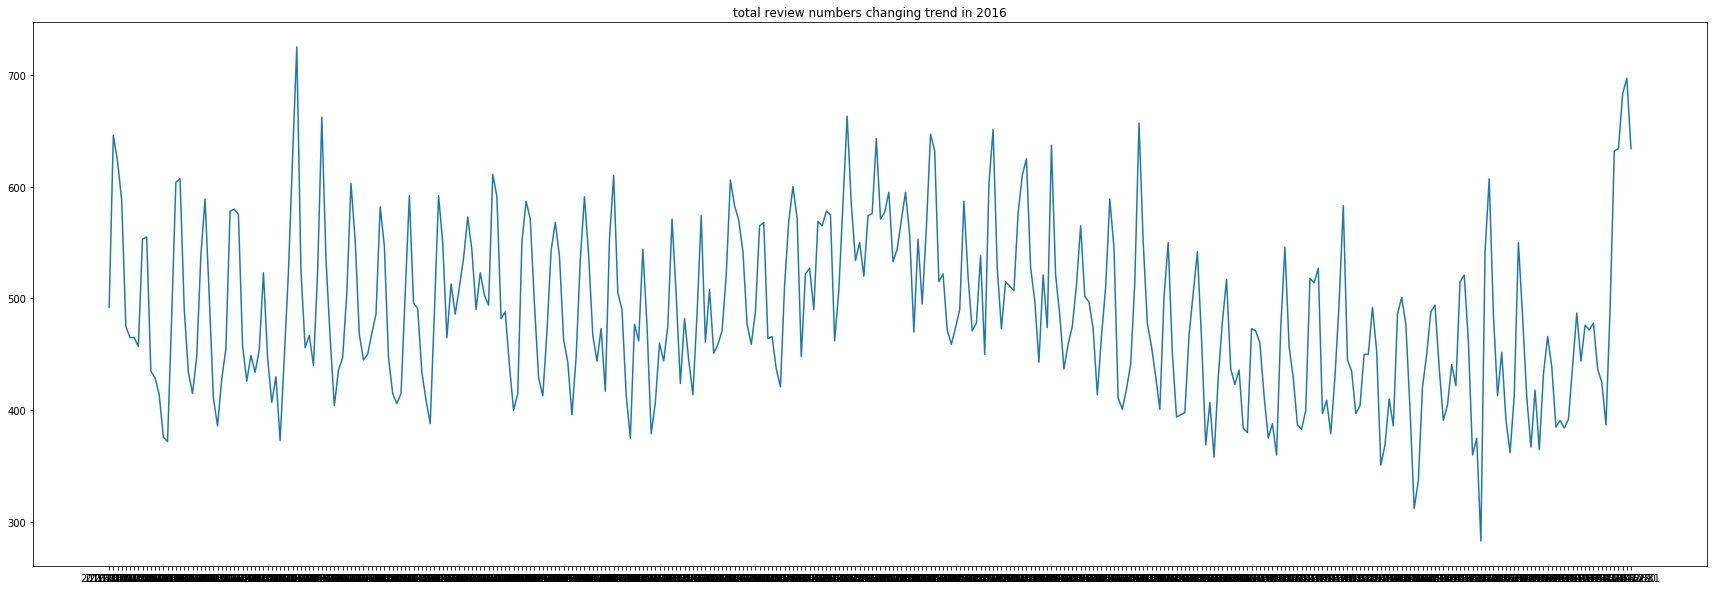

In [46]:
plt.figure(figsize=(30,10))
plt.plot(df_time['date'])
plt.title('total review numbers changing trend in 2016')
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df_time['1star_reviews'], color='red', label='1 start reviews')
plt.plot(df_time['2star_reviews'], color='orange', label='2 start reviews')
plt.plot(df_time['3star_reviews'], color='yellow', label='3 start reviews')
plt.plot(df_time['4star_reviews'], color='green', label='4 start reviews')
plt.plot(df_time['5star_reviews'], color='blue', label='5 start reviews')
plt.legend()
plt.title('different review numbers changing trend in 2016')
plt.show()

## Save preprocessed dataset to csv file

In [31]:
df_joined.to_csv('dataset/last_2_years_restaurant_reviews.csv', index = False)